In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
time = np.linspace(0, 1, 1000)
frequency = 500  # Hz
amplitude = 5  # mV
noise = np.random.normal(0, 0.5, len(time))
eod_signal = amplitude * np.sin(2 * np.pi * frequency * time) + noise

In [ ]:
water_conductivity = np.random.uniform(100, 500, len(time))  # µS/cm, random!
temperature = np.random.uniform(10, 30, len(time))  # Celsius, random!

#obstacle_present = np.random.choice([0, 1], size=len(time), p=[0.4, 0.6])
obstacle_present = np.zeros(len(time), dtype=int)

i = 0
while i < len(time):
    if np.random.rand() < 0.6:  # 60% chance to start an obstacle
        block_length = np.random.randint(10, 50)  # size of the obstacle (in time steps)
        obstacle_present[i:i+block_length] = 1
        i += block_length
    else:
        i += np.random.randint(1, 20)
signal_strength = np.where(obstacle_present == 1, eod_signal * 0.7, eod_signal)

In [ ]:
eod_dataset = pd.DataFrame({
    'Time (s)': time,
    'EOD Signal (mV)': eod_signal,
    'Water Conductivity (µS/cm)': water_conductivity,
    'Temperature (°C)': temperature,
    'Obstacle Present': obstacle_present,
    'Signal Strength (mV)': signal_strength
})

In [ ]:
eod_dataset.to_csv("synthetic_eod_dataset.csv", index=False)

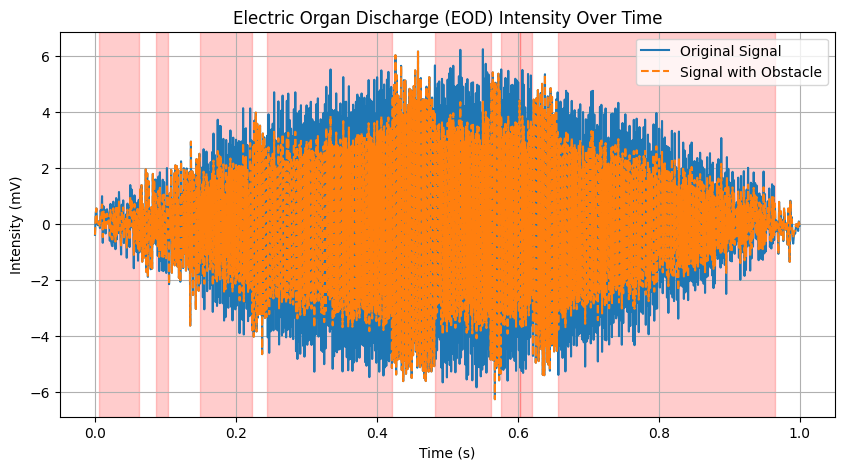

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(eod_dataset['Time (s)'], eod_dataset['EOD Signal (mV)'], label='Original Signal')
plt.plot(eod_dataset['Time (s)'], eod_dataset['Signal Strength (mV)'], label='Signal with Obstacle', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (mV)')
plt.title('Electric Organ Discharge (EOD) Intensity Over Time')
plt.legend()
plt.grid(True)
# Maybe do extended graph for multiple discharges over time
# Maybe also try variable speeds/acceleration
# Different Obstacles/amount of fish? (Or stronger affect from obstacles?)
start = None
in_obstacle = False

for i in range(len(obstacle_present) - 1): #REDBANDZ !!!
    if obstacle_present[i] == 0 and obstacle_present[i + 1] == 1:
        start = time[i + 1]
    elif obstacle_present[i] == 1 and obstacle_present[i + 1] == 0:
        end = time[i + 1]
        if start is not None:
          plt.axvspan(start, end, color='red', alpha=0.2, label='Obstacle' if 'Obstacle' not in plt.gca().get_legend_handles_labels()[1] else None)
plt.show()

In [ ]:
def analytical_potential(x, y, p=1, epsilon=1):
    r = np.sqrt(x**2 + y**2) + 1e-9
    return (p * x) / (4 * np.pi * epsilon * r**2)
    #Epotential, dipole

In [ ]:
grid_size = 50
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

In [ ]:
phi_analytical = analytical_potential(X, Y)

In [ ]:
phi_numerical = np.zeros((grid_size, grid_size))  #Dipole type STUFF (Fish is lowkey a dipole)
phi_numerical[grid_size//2 - 1, grid_size//2] = 1  # Positive charge
phi_numerical[grid_size//2 + 1, grid_size//2] = -1  # Negative charge


In [ ]:
def laplace_solver(phi, iterations=1000):
    for _ in range(iterations):
        phi[1:-1, 1:-1] = 0.25 * (
            phi[1:-1, :-2] + phi[1:-1, 2:] +
            phi[:-2, 1:-1] + phi[2:, 1:-1]
        )
    return phi
    #2D Laplace 1000 iterations

In [ ]:
phi_numerical = laplace_solver(phi_numerical.copy())


In [ ]:
rmse = np.sqrt(np.mean((phi_analytical - phi_numerical)**2))
print(f"RMSE between analytical and numerical solution: {rmse:.4f}")

RMSE between analytical and numerical solution: 0.1455


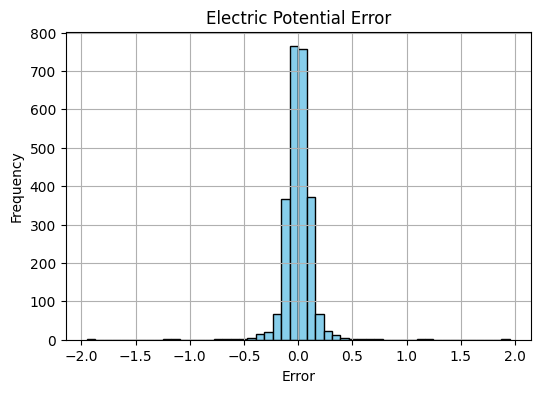

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist((phi_analytical - phi_numerical).ravel(), bins=50, color='skyblue', edgecolor='black')
plt.title('Electric Potential Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()